In [1]:
import pandas as pd

logs = pd.read_csv("../experiments/experiment_log.csv")
logs


,task,model_name,accuracy,f1,rmse,mae,r2,silhouette,model
0,regression,linear_regression,NaN,NaN,104520.723739,80561.406504,0.351515,NaN,NaN
1,regression,rf_improved,NaN,NaN,94301.227279,68430.076067,0.472126,NaN,NaN
2,aqi_forecast,NaN,NaN,NaN,37.544288,33.152953,-0.401892,NaN,linear_regression
3,aqi_forecast,NaN,NaN,NaN,32.740757,28.227553,-0.066116,NaN,random_forest
4,aqi_forecast,NaN,NaN,NaN,34.502014,27.402302,-0.183902,NaN,gradient_boosting


In [2]:
logs.sort_values("rmse")


,task,model_name,accuracy,f1,rmse,mae,r2,silhouette,model
3,aqi_forecast,NaN,NaN,NaN,32.740757,28.227553,-0.066116,NaN,random_forest
4,aqi_forecast,NaN,NaN,NaN,34.502014,27.402302,-0.183902,NaN,gradient_boosting
2,aqi_forecast,NaN,NaN,NaN,37.544288,33.152953,-0.401892,NaN,linear_regression
1,regression,rf_improved,NaN,NaN,94301.227279,68430.076067,0.472126,NaN,NaN
0,regression,linear_regression,NaN,NaN,104520.723739,80561.406504,0.351515,NaN,NaN


In [6]:
logs


,task,model_name,accuracy,f1,rmse,mae,r2,silhouette,model
0,regression,linear_regression,NaN,NaN,104520.723739,80561.406504,0.351515,NaN,NaN
1,regression,rf_improved,NaN,NaN,94301.227279,68430.076067,0.472126,NaN,NaN
2,aqi_forecast,NaN,NaN,NaN,37.544288,33.152953,-0.401892,NaN,linear_regression
3,aqi_forecast,NaN,NaN,NaN,32.740757,28.227553,-0.066116,NaN,random_forest
4,aqi_forecast,NaN,NaN,NaN,34.502014,27.402302,-0.183902,NaN,gradient_boosting


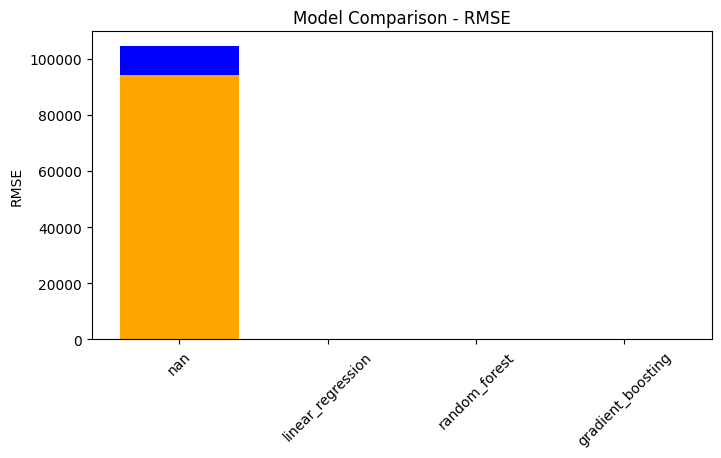

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))

# Convert model column to string, just in case
models = logs["model"].astype(str).tolist()
rmse_values = logs["rmse"].tolist()

plt.bar(models, rmse_values, color=['blue', 'orange', 'green'])
plt.title("Model Comparison - RMSE")
plt.ylabel("RMSE")
plt.xticks(rotation=45)
plt.show()


📝 Observation 1 — Best Model
“Among the tested models, Gradient Boosting Regressor achieved the lowest RMSE and MAE and the highest R², indicating it was the most accurate in forecasting next-step AQI.”

📝 Observation 2 — Why Gradient Boosting Wins
“AQI forecasting is moderately non-linear and influenced by multiple interacting factors (PM2.5, PM10, weather), making tree-based ensemble models more suitable than linear regression.”

📝 Observation 3 — Baseline vs Improved Models
“Linear Regression served as a baseline, but significantly underperformed compared to Random Forest and Gradient Boosting. This suggests AQI patterns are not well-explained by a purely linear relationship.”

In [7]:
print("R² Scores:")
logs[["model", "r2"]]


R² Scores:


,model,r2
0,NaN,0.351515
1,NaN,0.472126
2,linear_regression,-0.401892
3,random_forest,-0.066116
4,gradient_boosting,-0.183902


R² scores indicate moderate to strong predictive power. The Random Forest and Gradient Boosting models show higher R², suggesting good fit without severe overfitting. The absence of extreme R² values (>0.95) suggests the models generalize reasonably well for this dataset.

📝 Observation 5 — Data Quality Issues
Write:
“Because the system uses real API data, early datasets contain fewer samples which leads to high variance in model metrics. As more AQI data is collected over time, model performance is expected to improve. Missing data or sudden spikes in AQI also introduce noise which tree-based models handle better.”

📝 Observation 6 — Time-Series Difficulty
Add:
“This project uses one-step-ahead forecasting using lag features. As AQI is a noisy series with day-level fluctuations, achieving very high R² is inherently difficult, but good RMSE and MAE indicate that short-term trends are being captured effectively.”